<a href="https://colab.research.google.com/github/sapana27/Machine-Learning-projects/blob/main/KNeighborsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

In [2]:
data.cleaned=data.copy()

In [3]:
mean_age=data['Age'].mean()
mean_age
data.cleaned['Age']=data['Age'].fillna(value=mean_age)
mode_embarked=data['Embarked'].mode()[0]
mode_embarked
data.cleaned['Embarked']=data['Embarked'].fillna(value=mode_embarked)
data.cleaned['Sex']=pd.get_dummies(data['Sex'], drop_first=True).astype(int)
data.cleaned=data.cleaned.drop(['Name','Ticket', 'Cabin'], axis=1)
data.cleaned=pd.get_dummies(data.cleaned).astype(int)
data.cleaned = pd.concat([data.cleaned, data[['Name', 'Ticket', 'Cabin']]], axis=1)

In [4]:
data.cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Name,Ticket,Cabin
0,1,0,3,1,22,1,0,7,0,0,1,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,2,1,1,0,38,1,0,71,1,0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85
2,3,1,3,0,26,0,0,7,0,0,1,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN
3,4,1,1,0,35,1,0,53,0,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123
4,5,0,3,1,35,0,0,8,0,0,1,"Allen, Mr. William Henry",373450,NaN


In [5]:
pclass_dummies = pd.get_dummies(data.cleaned['Pclass'], prefix='Pclass').astype(int)
data.cleaned=pd.concat([data.cleaned, pclass_dummies], axis=1)
data.cleaned.drop('Pclass', axis=1, inplace=True)


In [6]:
x=data.cleaned.drop(['Survived', 'Name', 'Ticket','Cabin' ], axis=1)
y=data.cleaned['Survived']

In [7]:
x.shape, y.shape

((891, 12), (891,))

In [8]:
x.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,1,22,1,0,7,0,0,1,0,0,1
1,2,0,38,1,0,71,1,0,0,1,0,0
2,3,0,26,0,0,7,0,0,1,0,0,1
3,4,0,35,1,0,53,0,0,1,1,0,0
4,5,1,35,0,0,8,0,0,1,0,0,1


In [9]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x=ss.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y=train_test_split(x, y, random_state=42, stratify=y)

In [11]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [12]:
#  checking consistancy using cross validation
from sklearn.model_selection import cross_val_score
score= cross_val_score(KNN(n_neighbors=9), X=train_x, y=train_y, cv=10)
score

array([0.82089552, 0.76119403, 0.82089552, 0.74626866, 0.92537313,
       0.7761194 , 0.8358209 , 0.79104478, 0.8030303 , 0.8030303 ])

In [13]:
score.mean()*100, score.std()*100

(80.83672546359114, 4.715559412137135)

In [14]:
def val_score(n_neighbors):
  avg=[]
  std=[]
  for i in n_neighbors:
    score= cross_val_score(KNN(n_neighbors=i), X=train_x, y=train_y, cv=10)
    avg.append(score.mean())
    std.append(score.std())
  return avg, std


In [15]:
n_neighbors=range(5, 55)
mean, std=val_score(n_neighbors)

([<matplotlib.axis.XTick at 0x79dc8f25eec0>,
 [Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50')])

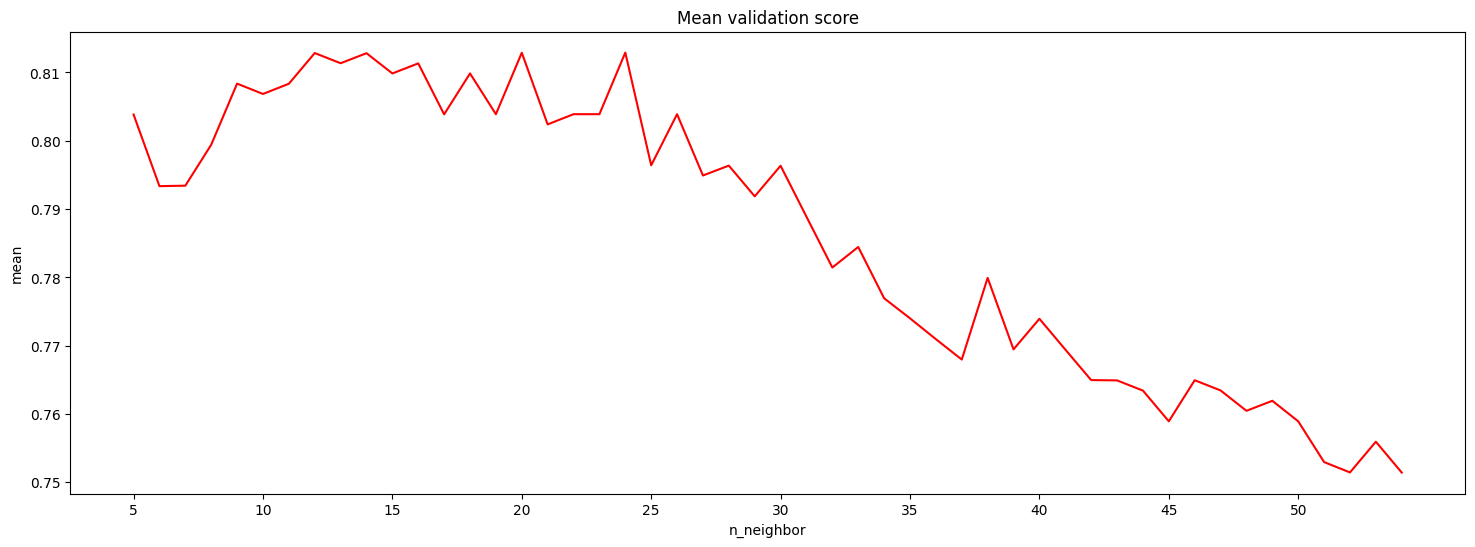

In [16]:

plt.figure(figsize=(18, 6))
plt.plot(n_neighbors, mean, color='red',label='mean' )
plt.xlabel("n_neighbor")
plt.ylabel('mean')
plt.title("Mean validation score")
plt.xticks(range(5, 55, 5))

([<matplotlib.axis.XTick at 0x79dc8cd73ca0>,
 [Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50')])

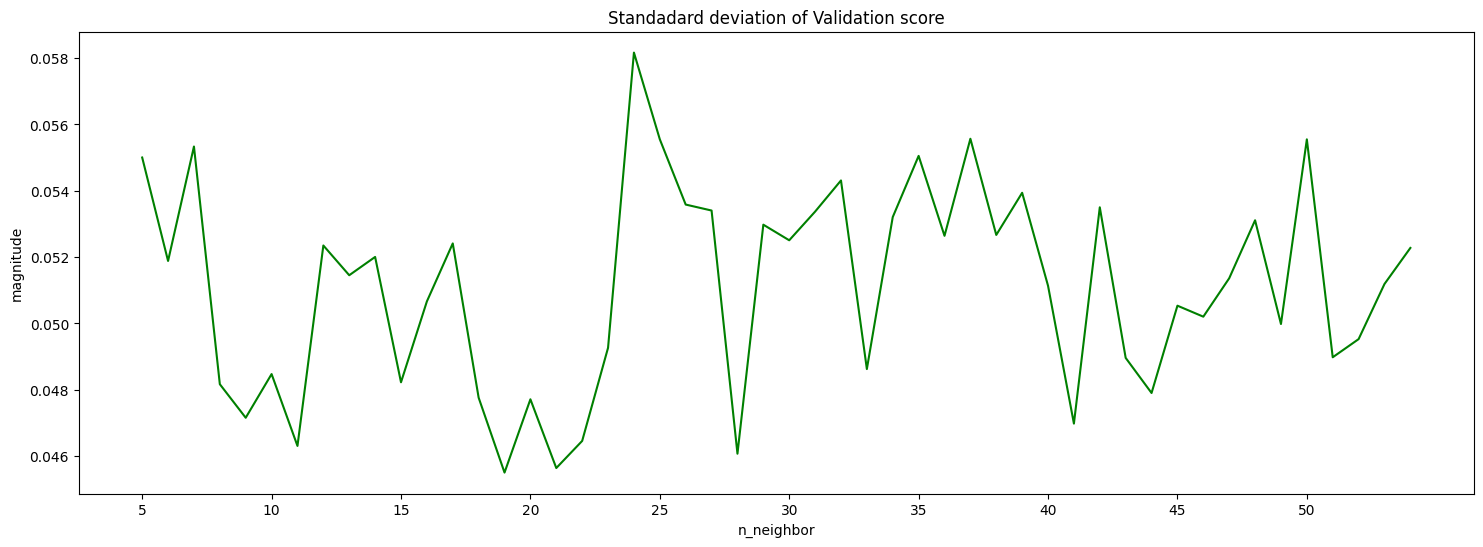

In [17]:
plt.figure(figsize=(18, 6))
plt.plot(n_neighbors, std, color='green',label='mean' )
plt.xlabel("n_neighbor")
plt.ylabel('magnitude')
plt.title("Standadard deviation of Validation score")
plt.xticks(range(5, 55, 5))

In [20]:
clf=KNN(n_neighbors=11)#from above graphs we get to know 11 is best value for neighbors
clf.fit(train_x, train_y)
score1=clf.score(train_x, train_y)
score2=clf.score(test_x, test_y)
score1, score2

(0.8353293413173652, 0.7847533632286996)